# Principal Component Analysis Project  



## GOAL: Figure out which handwritten digits are most differentiated with PCA.

Imagine we are working on an image recognition service for a postal service. It would be very useful to be able to read in the digits automatically, even if they are handwritten. **In fact, this is very much how modern postal services work for a long time now and its actually more accurate than a human.**

The manager of the postal service wants to know which handwritten numbers are the hardest to tell apart, so he can focus on getting more labeled examples of that data. The dataset includes hand written digits (a very famous data set) and I will perform `Principal Component Analysis` to get better insight into which numbers are easily separable from the rest.


# Citation:

    Background:

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


#### Data Set Information from Original Authors:

We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

---------------------------------------------------------------------------------------------------------------------------------------------

**Let's get started on the project by importing the essential libraries:**

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [212]:
digits = pd.read_csv('../DATA/digits.csv')

In [213]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


**First I create a new DataFrame called *pixels* that consists only of the pixel feature values by dropping the number_label column.**

In [214]:
pixels = digits.drop('number_label', axis=1)

In [215]:
pixels.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


### Displaying an Image

**Let's grab a single image row representation by getting the first row of the pixels DataFrame.**

In [216]:
# Get the first row of the dataframe
pixels.iloc[0]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

**Now I convert this single row Series into a numpy array.**

In [217]:
# Converting from Pandas Series to Numpy array
numpy_array = pixels.iloc[0].to_numpy()
numpy_array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [218]:
numpy_array.shape

(64,)

In [219]:
# Reshape the numpy array into an (8,8) array
reshaped_array = numpy_array.reshape((8, 8))
reshaped_array

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [220]:
reshaped_array.shape

(8, 8)

**Using Seaborn I am going to display the array as an image representation of the number drawn. Remember the palette or cmap choice would change the colors, but not the actual pixel values.**

<Axes: >

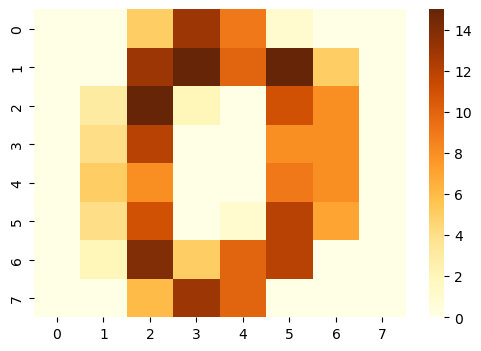

In [221]:
plt.figure(figsize=(6, 4), dpi=100)
sns.heatmap(data=reshaped_array, cmap="YlOrBr")

<Axes: >

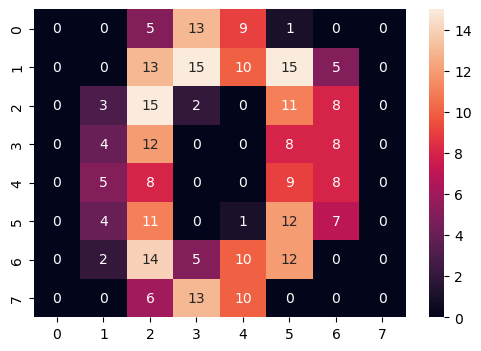

In [222]:
plt.figure(figsize=(6, 4), dpi=100)
sns.heatmap(data=reshaped_array, annot=True)

## Now let's move on to the PCA part:

## First Step: Scaling the Data

In [223]:
# Scale data
from sklearn.preprocessing import StandardScaler

# Instanciate a scaler object
scaler = StandardScaler()

In [224]:
# Fit the data into the scaler object and then transform it
scaler.fit(pixels)

scaled_pixel = scaler.transform(pixels)
scaled_pixel

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## PCA

**TASK: Perform PCA on the scaled pixel data set with 2 components.**

In [225]:
from sklearn.decomposition import PCA

# Instanciate the pca model and choosing 2 as the number of components
pca_model = PCA(n_components=2)

# Fit and transform the scaled pixel dataset
pca_pixel = pca_model.fit_transform(scaled_pixel)
pca_pixel

array([[ 1.91421596, -0.95445294],
       [ 0.58898446,  0.92460687],
       [ 1.3020425 , -0.31722989],
       ...,
       [ 1.0225937 , -0.14790883],
       [ 1.07606069, -0.38089654],
       [-1.25770346, -2.22757589]])

**Now let's see how much variance is explained by 2 principal components.**

In [226]:
# Explained variance by each of the two principal components
pca_model.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [227]:
np.round(np.sum(pca_model.explained_variance_ratio_), 3)

0.216

## Creating a scatterplot of the digits in the 2 dimensional PCA space:

**Now I am going to create a scatter plot of the digits in the 2D PCA space, color/label based on the original number_label column in the original dataset.**

In [228]:
# Grab the first and second columns of the pca_model numpy array 
col1 = pca_pixel[:,0]
col2 = pca_pixel[:,1]

print('pca_model numpy array is: ')
print()
print(pca_pixel)
print()
print('The first column values are: ')
print(col1)
print()
print('The second column values are: ')
print(col2)

pca_model numpy array is: 

[[ 1.91421596 -0.95445294]
 [ 0.58898446  0.92460687]
 [ 1.3020425  -0.31722989]
 ...
 [ 1.0225937  -0.14790883]
 [ 1.07606069 -0.38089654]
 [-1.25770346 -2.22757589]]

The first column values are: 
[ 1.91421596  0.58898446  1.3020425  ...  1.0225937   1.07606069
 -1.25770346]

The second column values are: 
[-0.95445294  0.92460687 -0.31722989 ... -0.14790883 -0.38089654
 -2.22757589]


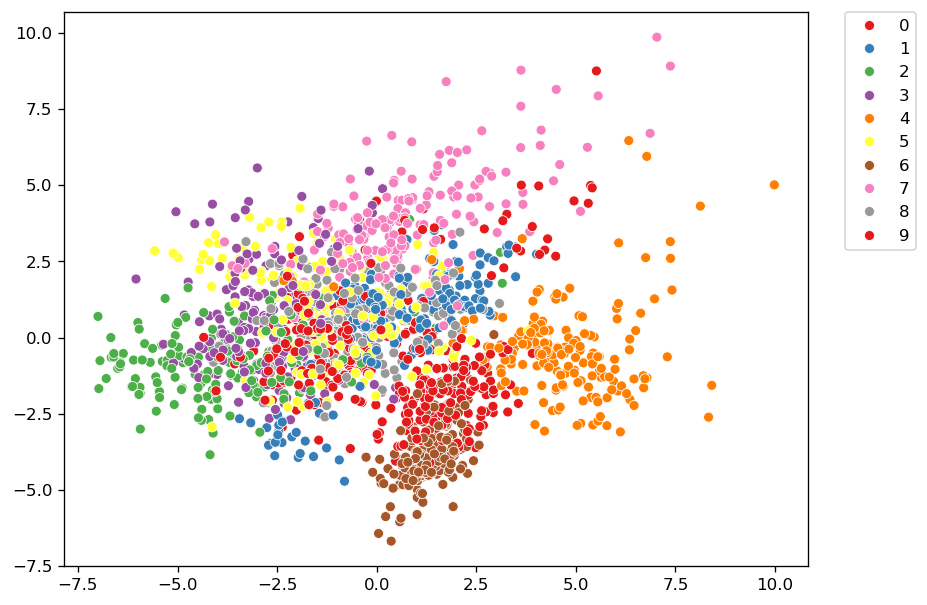

In [229]:
plt.figure(figsize=(8, 6), dpi=120)

# The hue must be the original dataframe (digits) number labels values
hue = digits['number_label'].values
sns.scatterplot(x=col1, y=col2, hue=hue, palette='Set1')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

**It is clear that `label 4` is the most separated group. `Labels 2, 6 and 9` are also almost recognizable. It seems that `labels 5 and 8` seem to be the least recognizable digits.**

## Making an Interactive 3D Scatterplot 

Last but not least, I am going to create an "interactive" 3D plot of the result of PCA with 3 principal components. Lot's of ways to do this, including different libraries like `plotly` or `bokeh`. I will do this task with the `plotly` library.

**First, we have to make another pca model but this time with 3 principal components!**

In [231]:
# Instanciate the new pca model
new_pca_model = PCA(n_components=3)

# Fit and transform the scaled pixel dataset
pca_pixels_3D = new_pca_model.fit_transform(scaled_pixel)
pca_pixels_3D

array([[ 1.91421691, -0.95450986, -3.94609215],
       [ 0.58898043,  0.92462406,  3.92476337],
       [ 1.30203221, -0.31713776,  3.02343931],
       ...,
       [ 1.02259284, -0.14789775,  2.47002743],
       [ 1.07605979, -0.38098899, -2.45552554],
       [-1.25770143, -2.22756495,  0.28359002]])

In [232]:
# Check the explained variance by 3 principal components
np.round(np.sum(new_pca_model.explained_variance_ratio_), 4)

0.3004

In [233]:
col1 = pca_pixels_3D[:, 0]
col2 = pca_pixels_3D[:, 1]
col3 = pca_pixels_3D[:, 2]

print('pca_model numpy array is: ')
print()
print(pca_pixels_3D)
print()
print('The first column values are: ')
print(col1)
print()
print('The second column values are: ')
print(col2)
print()
print('The third column values are: ')
print(col3)

pca_model numpy array is: 

[[ 1.91421691 -0.95450986 -3.94609215]
 [ 0.58898043  0.92462406  3.92476337]
 [ 1.30203221 -0.31713776  3.02343931]
 ...
 [ 1.02259284 -0.14789775  2.47002743]
 [ 1.07605979 -0.38098899 -2.45552554]
 [-1.25770143 -2.22756495  0.28359002]]

The first column values are: 
[ 1.91421691  0.58898043  1.30203221 ...  1.02259284  1.07605979
 -1.25770143]

The second column values are: 
[-0.95450986  0.92462406 -0.31713776 ... -0.14789775 -0.38098899
 -2.22756495]

The third column values are: 
[-3.94609215  3.92476337  3.02343931 ...  2.47002743 -2.45552554
  0.28359002]


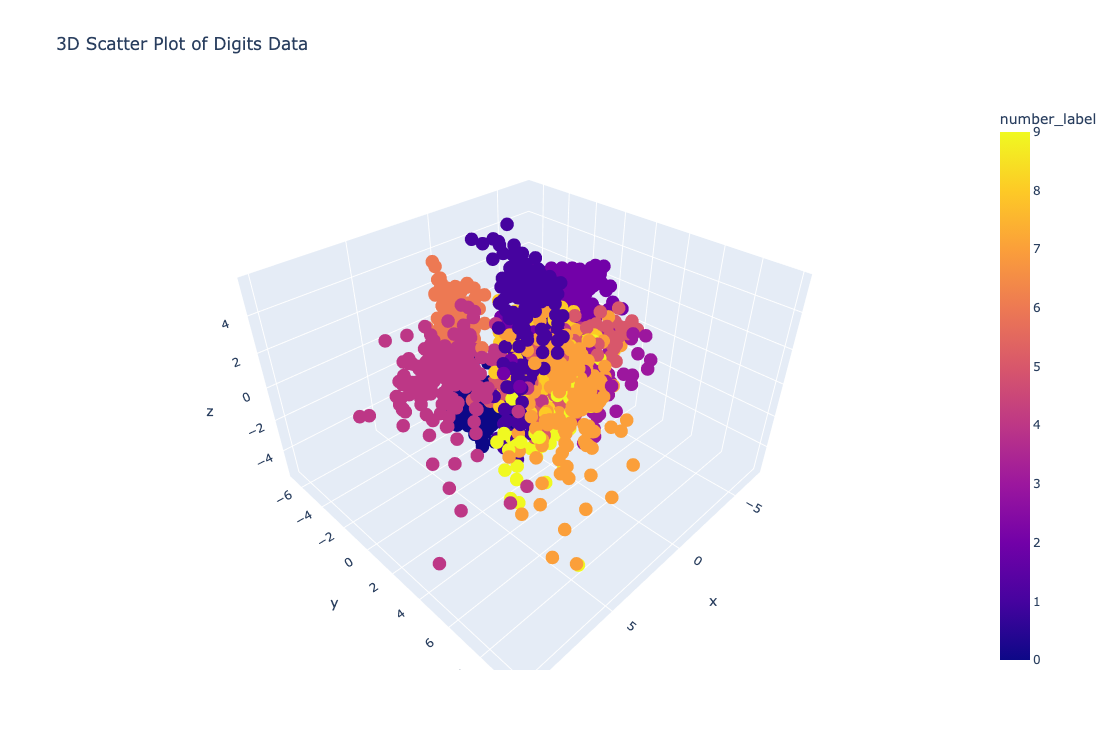

In [235]:
# The hue must be the original dataframe (digits) number labels values
hue = digits['number_label']

# Create the interactive 3D scatter plot with custom size
fig = px.scatter_3d(
    digits,
    x=col1,
    y=col2,
    z=col3,
    color=hue,
    labels={'color': 'Number Label'},
    title='3D Scatter Plot of Digits Data',
    width=1000,  # Set the width of the plot
    height=750   # Set the height of the plot
)

# Show the plot
fig.show()